In [1]:
import os
import numpy as np
import torch as pt
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from glob import glob
from matplotlib import rcParams

import src as sp
import runtime as rt
from theme import colors

# font parameters
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.size'] = 12

In [2]:
# find outputs
data_filepaths = glob("results/data/*.pt")

# load data
data = {os.path.basename(fp).split('.')[0]:pt.load(fp) for fp in data_filepaths}

# pack output
p_l = [data[key]['p'] for key in data]
y_l = [data[key]['y'] for key in data]

In [3]:
# type to residue mapping
type_to_resname = {
    'positive': ['ARG', 'HIS', 'LYS'],
    'negative': ['ASP', 'GLU'],
    'polar': ['SER', 'THR', 'ASN', 'GLN'],
    'special': ['CYS', 'GLY', 'PRO'],
    'hydrophobic': ['ALA', 'VAL', 'ILE', 'LEU', 'MET', 'PHE', 'TYR', 'TRP'],
}
resname_to_type = {rn:c for c in type_to_resname for rn in type_to_resname[c]}

# compute ratio of types
rp, ry, cp, cy = [], [], [], []
for i in tqdm(range(len(p_l))):
    p = p_l[i]
    y = y_l[i]
    
    tp = np.array([resname_to_type[sp.res1to3[c]] for c in rt.max_pred_to_seq(p)])    
    ty = np.array([resname_to_type[sp.res1to3[c]] for c in rt.max_pred_to_seq(y)])    

    ntp = sp.onehot(tp, list(type_to_resname)).astype(float)
    nty = sp.onehot(ty, list(type_to_resname)).astype(float)    

    cp.append(np.diff(np.sum(ntp, axis=0)[:2]).item())
    cy.append(np.diff(np.sum(nty, axis=0)[:2]).item())

    rp.append(np.mean(ntp, axis=0)[:-1])
    ry.append(np.mean(nty, axis=0)[:-1])
    
rp = np.array(rp)
ry = np.array(ry)
cp = np.array(cp)
cy = np.array(cy)

100%|██████████| 18866/18866 [00:10<00:00, 1855.91it/s]


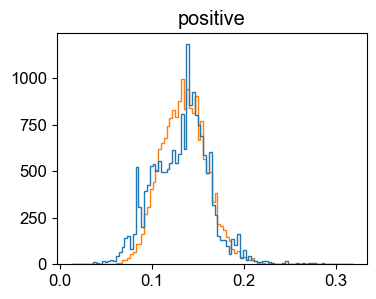

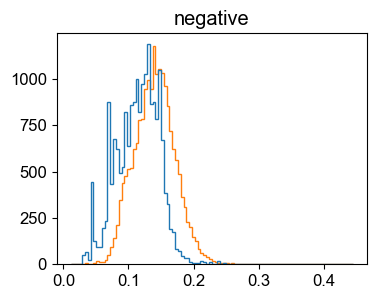

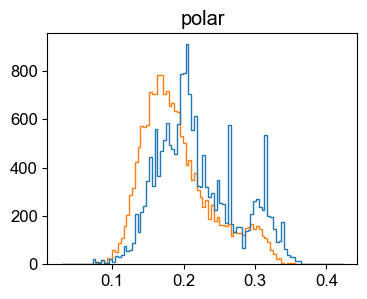

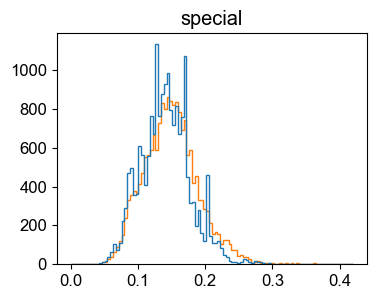

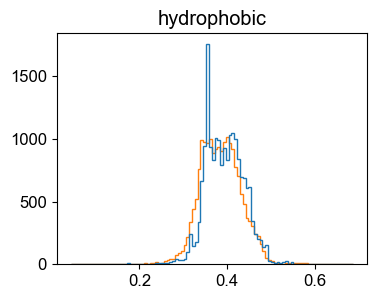

In [4]:
for i in range(len(type_to_resname)):
    rtype = list(type_to_resname)[i]

    # plot
    plt.figure(figsize=(4,3))
    plt.hist([ry[:,i], rp[:,i]], bins=100, histtype='step')
    plt.title(rtype)
    plt.show()

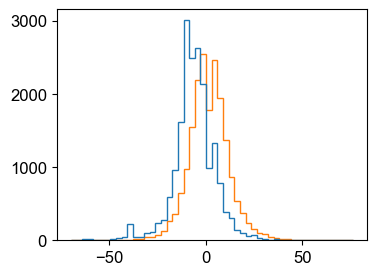

In [5]:
plt.figure(figsize=(4,3))
plt.hist([cy,cp], histtype='step', bins=50)
plt.show()